In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('class', axis=1))
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def knn_predict(X_train, y_train, x_test, k=3):
    distances = [(euclidean_distance(x_test, x), label) for x, label in zip(X_train, y_train)]
    k_nearest = sorted(distances, key=lambda x: x[0])[:k]
    votes = [label for _, label in k_nearest]
    return Counter(votes).most_common(1)[0][0]


In [16]:
k_values = range(1, 16)
accuracies = []
precisions = []
recalls = []

for k in k_values:
    print(k, " --- ")
    y_pred = [knn_predict(X_train, y_train, x, k=k) for x in X_test]
    print(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'))
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))


1  --- 
1.0 1.0 1.0
2  --- 
1.0 1.0 1.0
3  --- 
1.0 1.0 1.0
4  --- 
1.0 1.0 1.0
5  --- 
1.0 1.0 1.0
6  --- 
1.0 1.0 1.0
7  --- 
1.0 1.0 1.0
8  --- 
1.0 1.0 1.0
9  --- 
1.0 1.0 1.0
10  --- 
1.0 1.0 1.0
11  --- 
1.0 1.0 1.0
12  --- 
1.0 1.0 1.0
13  --- 
1.0 1.0 1.0
14  --- 
1.0 1.0 1.0
15  --- 
1.0 1.0 1.0


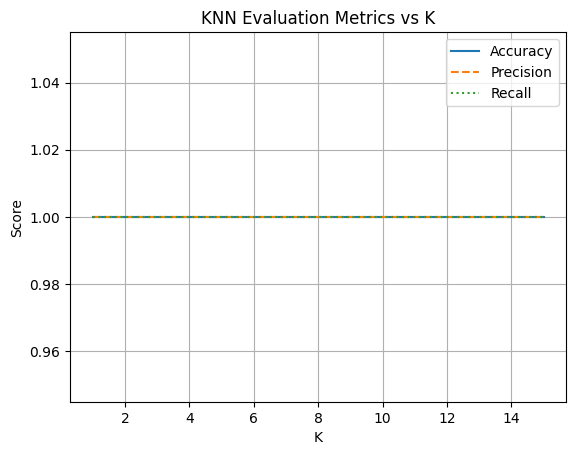

In [17]:
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision', linestyle='--')
plt.plot(k_values, recalls, label='Recall', linestyle=':')
plt.xlabel('K')
plt.ylabel('Score')
plt.title('KNN Evaluation Metrics vs K')
plt.legend()
plt.grid(True)
plt.show()


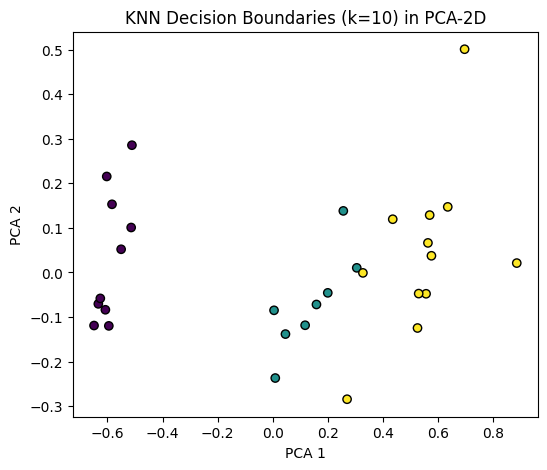

In [18]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

def knn_predict_2d(X_train, y_train, x_test, k):
    return knn_predict(X_train, y_train, x_test, k)

k = 10
y_pred_2d = [knn_predict_2d(X_train_2d, y_train, x, k) for x in X_test_2d]

plt.figure(figsize=(6, 5))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_2d, cmap='viridis', marker='o', label='Predicted', edgecolor='k')
plt.title(f"KNN Decision Boundaries (k={k}) in PCA-2D")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
